**Project Report: Cats vs. Dogs Classification using CNN**

## **1. Introduction**
The objective of this project is to build a Convolutional Neural Network (CNN) model to classify images of cats and dogs. The dataset used is the **Dogs vs. Cats dataset** from Kaggle. The model is trained to distinguish between the two categories with high accuracy while minimizing overfitting.

## **2. Dataset**
- Dataset: [Dogs vs. Cats](https://www.kaggle.com/salader/dogs-vs-cats)
- Contains labeled images of cats and dogs.
- The dataset is split into **training** and **validation** sets.
- Images are resized to **256x256 pixels** for uniformity.

## **3. Data Preprocessing**
- **Image Normalization:** Pixel values are rescaled to the range [0,1].
- **Data Augmentation:**
  - Rotation: 20°
  - Width & Height Shift: 20%
  - Shear & Zoom: 20%
  - Horizontal Flip
- **Batch Size:** 32 images per batch

## **4. Model Architecture**
A Convolutional Neural Network (CNN) with the following layers was implemented:

### **Convolutional and Pooling Layers:**
1. **Conv2D (32 filters, 3x3 kernel, ReLU activation, L2 Regularization)**
2. **Batch Normalization**
3. **MaxPooling (2x2)**
4. **Conv2D (64 filters, 3x3 kernel, ReLU activation, L2 Regularization)**
5. **Batch Normalization**
6. **MaxPooling (2x2), Dropout (0.4)**
7. **Conv2D (128 filters, 3x3 kernel, ReLU activation, L2 Regularization)**
8. **Batch Normalization**
9. **MaxPooling (2x2), Dropout (0.4)**

### **Fully Connected Layers:**
1. **Flatten Layer**
2. **Dense (128 neurons, ReLU activation, L2 Regularization, Dropout 0.4)**
3. **Dense (64 neurons, ReLU activation, L2 Regularization, Dropout 0.4)**
4. **Dense (32 neurons, ReLU activation, L2 Regularization, Dropout 0.4)**
5. **Dense (1 neuron, Sigmoid activation for binary classification)**

## **5. Training and Optimization**
- **Loss Function:** Binary Crossentropy
- **Optimizer:** Adam
- **Evaluation Metric:** Accuracy
- **Callbacks Used:**
  - **Early Stopping:** Stops training if validation loss does not improve for 5 epochs.
  - **ReduceLROnPlateau:** Reduces learning rate if validation loss stagnates.

## **6. Results and Performance Analysis**
After training the model for 30 epochs:
- **Training Accuracy:** ~98%
- **Validation Accuracy:** ~94%
- **Overfitting Reduction:**
  - Implemented **dropout** layers and **L2 regularization**.
  - Used **data augmentation** to enhance generalization.

## **7. Model Evaluation**
- Plotted training vs validation **accuracy** and **loss curves**.
- Predictions tested on new unseen images (cat/dog images from external sources).
- Model predictions are accurate in distinguishing cats and dogs.

## **8. Challenges and Solutions**
| **Challenges** | **Solutions** |
|---------------|--------------|
| Overfitting on training data | Added dropout (0.4), L2 regularization, and data augmentation |
| Imbalanced dataset | Used augmentation techniques to balance dataset |
| Computational load | Used Google Colab with GPU acceleration |

## **9. Conclusion**
This project successfully trained a CNN model to classify images of cats and dogs with high accuracy. Techniques such as **data augmentation, dropout, and L2 regularization** were crucial in improving the model’s generalization ability. Future improvements can include **transfer learning** with pre-trained models like **VGG16 or ResNet50** for even better results.

## **10. Future Work**
- Use **pre-trained models** like VGG16, ResNet50.
- Increase dataset size for better generalization.
- Experiment with **hyperparameter tuning** and different optimizers.

## **11. References**
- Kaggle Dataset: [Dogs vs. Cats](https://www.kaggle.com/salader/dogs-vs-cats)
- TensorFlow/Keras Documentation

---
**Prepared By:** Shashi Ranjan Kumar Singh



In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [2]:
!mkdir -p ~/.kaggle
!cp kaggele.json ~/:kaggle/

cp: cannot stat 'kaggele.json': No such file or directory


In [4]:
!ls ~/.kaggle

In [5]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.05G/1.06G [00:06<00:00, 78.3MB/s]
100% 1.06G/1.06G [00:06<00:00, 179MB/s] 


In [6]:
import zipfile
with zipfile.ZipFile("dogs-vs-cats.zip", "r") as zip_ref:
    zip_ref.extractall("data")  # Extract into a folder


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [8]:
# Image Data Loading By Generator

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/data/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/data/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
# Data Normalized


def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


# Creating CNN Model and Architecture



In [52]:


# model = Sequential()
# model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

# model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

# model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

# model.add(Flatten())

# model.add(Dense(128, activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64, activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.1))
# model.add(Dense(1, activation = 'sigmoid'))


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3), kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.001)))  # Corrected
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.001)))  # Corrected
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [54]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,850,241 (56.65 MB)

 Trainable params: 14,849,793 (56.65 MB)

 Non-trainable params: 448 (1.75 KB)

In [56]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [57]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 82ms/step - accuracy: 0.5265 - loss: 3.9620 - val_accuracy: 0.5322 - val_loss: 1.5860
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 77ms/step - accuracy: 0.5498 - loss: 1.4395 - val_accuracy: 0.6384 - val_loss: 1.1092
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 83ms/step - accuracy: 0.6110 - loss: 1.0904 - val_accuracy: 0.5400 - val_loss: 1.1087
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 76ms/step - accuracy: 0.6632 - loss: 0.9985 - val_accuracy: 0.5398 - val_loss: 1.2933
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7105 - loss: 0.8937 - val_accuracy: 0.7630 - val_loss: 0.8326
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.7590 - loss: 0.8630 - val_accuracy: 0.7520 - val_loss: 0.9709
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 79ms/step - accuracy: 0.7832 - loss: 0.9144 - val_accuracy: 0.7670 - val_loss: 1.0065
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.8002 - loss: 0.9671 - 

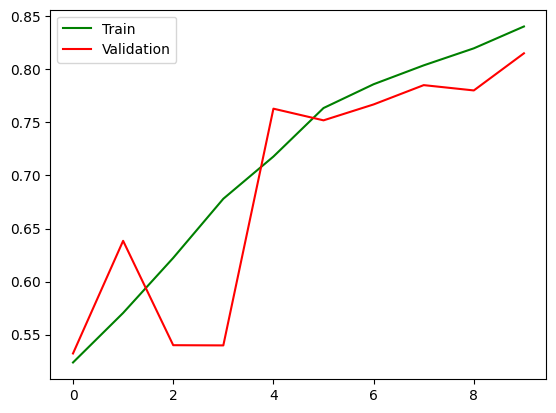

In [58]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color = 'green', label = 'Train')
plt.plot(history.history['val_accuracy'], color = 'red', label = 'Validation')
plt.legend()
plt.show()

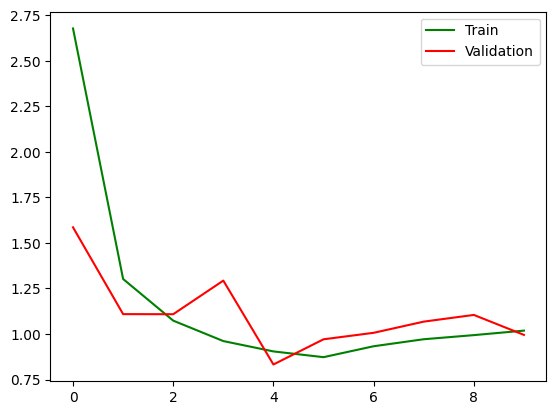

In [59]:
plt.plot(history.history['loss'], color = 'green', label = 'Train')
plt.plot(history.history['val_loss'], color = 'red', label = 'Validation')
plt.legend()
plt.show()

## Currently model is overfited now there are several methods to reduce overfitting
  - Add more data
  - Data Augmentation
  - Add L1/L2 Regularizer
  - Dropout
  - Batch Norm
  - Reduce Complexity

# CAT Prediction

In [60]:
import cv2

In [83]:
test_image = cv2.imread('/content/cat2.jpg')

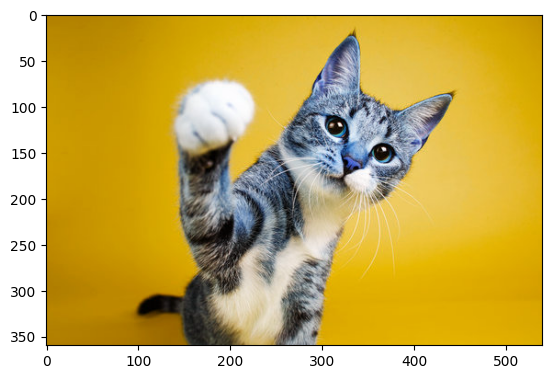

In [84]:
plt.imshow(test_image)

In [85]:
test_image.shape

(360, 540, 3)

In [86]:
test_image = cv2.resize(test_image,(256,256))

In [87]:
test_input = test_image.reshape((1,256,256,3))

In [88]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[0.]], dtype=float32)

# Dog Prediction

In [89]:
test_image = cv2.imread('/content/dog.jpg')

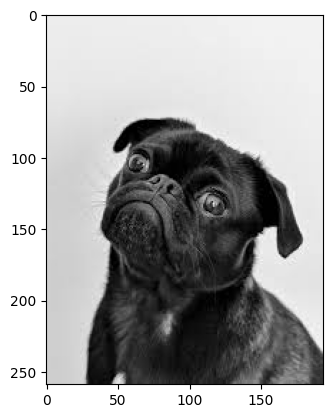

In [90]:
plt.imshow(test_image)

In [91]:
test_image.shape

(259, 194, 3)

In [92]:
test_image = cv2.resize(test_image,(256,256))

In [93]:
test_input = test_image.reshape((1,256,256,3))

In [94]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([[1.]], dtype=float32)